# One Single Model Prediction

## Section 1: Data Preparation

### Import packages

In [1]:
from warnings import simplefilter
simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
# models necessary to define the forecasting models 
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from forecast_combine.forecast import Forecast

### Lire les donnees

In [3]:
# set the seed for reproducibility
np.random.seed(41)
# generate an ARIMA process
data = pd.Series(np.cumsum(np.random.normal(0, 1, size=1000)), 
                 index=pd.date_range(end='31/12/2022', periods=1000)).rename('y').to_frame()
data.head(2)

,y
2020-04-06,-0.270712
2020-04-07,-0.165864


<Axes: >

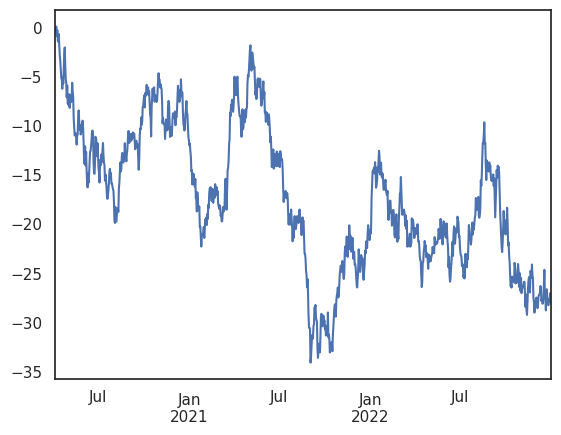

In [4]:
data.y.plot()

## Section 2: Model Definition

In [5]:
model = StatsForecastAutoARIMA(n_jobs = 4, trend=True, seasonal=True, max_p= 10, max_q=10)

In [6]:
LF = Forecast(data = data,
                          depvar_str='y',      
                          exog_l= None,
                          forecaster_name = 'AutoARIMA',
                          forecaster= model,
                          fh = 5,
                          pct_initial_window = 0.5,
                          step_length = 25, 
                          freq = 'B')

In [7]:
LF.split_procedure_summary()

Number of Folds      : 15
Initial Window Size  : 357
Step Length          : 25
Forecast Horizon     : 5
First Cutoff         : 2021-08-17 00:00:00
Last Curoff          : 2022-12-20 00:00:00


{'Number of Folds': 15,
 'Initial Window Size': 357,
 'Step Length': 25,
 'Forecast Horizon': 5,
 'First Cutoff': Timestamp('2021-08-17 00:00:00'),
 'Last Curoff': Timestamp('2022-12-20 00:00:00')}

## Section 3: In-sample vs Out-Of-smaple

### Cross validation Procedure

(<Figure size 1500x600 with 1 Axes>,
 <Axes: title={'center': 'Insample vs Out-Of-Sample'}, ylabel='y'>)

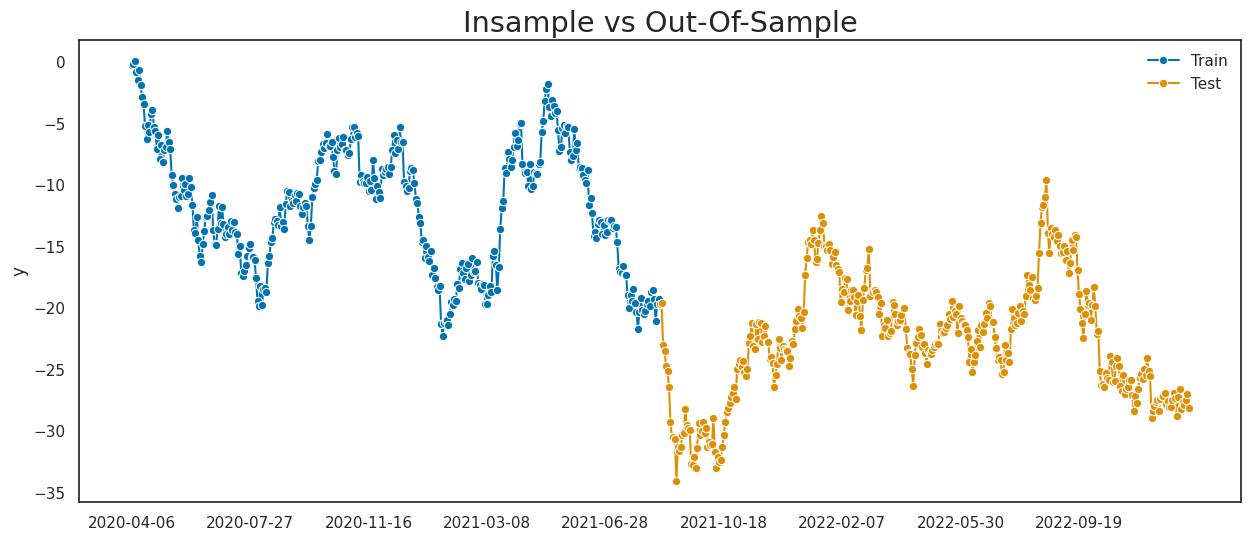

In [8]:
LF.plot.plot_train_test(
    labels = ['Train', 'Test'],
    title='Insample vs Out-Of-Sample')

<Axes: title={'center': 'Cross Validation Procedure'}, ylabel='Window number'>

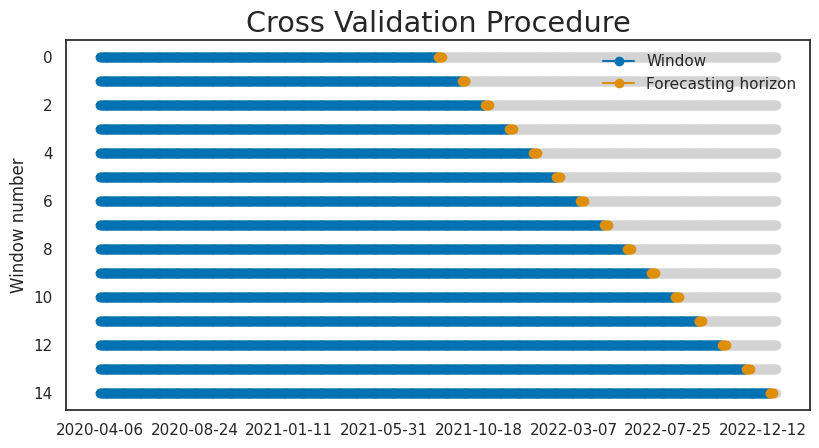

In [9]:
LF.plot.plot_cv_procedure(xlabel='')

### Fit

In [10]:
lf_fit= LF.fit(on='train')

In [11]:
lf_fit.insample_result_df

### In Sample Evaluation

In [12]:
pred = lf_fit.insample_predictions(nsample =200)
display(pred.head())

100%|██████████| 352/352 [00:01<00:00, 198.13it/s]


,cutoff,horizon,index,y_pred,y_true,error,error_pct
0,2020-04-06,1,2020-04-07,-0.270712,-0.165864,0.104848,-0.632132
1,2020-04-06,2,2020-04-08,-0.165864,0.084664,0.250528,2.959099
2,2020-04-06,3,2020-04-09,0.084664,-0.840536,-0.925200,-1.100726
3,2020-04-06,4,2020-04-10,-0.840536,-1.467249,-0.626713,-0.427134
4,2020-04-06,5,2020-04-13,-1.467249,-0.677397,0.789852,-1.166010


In [13]:
insample_perf_summary = lf_fit.insample_perf()

In [14]:
display(insample_perf_summary['cutoff'].head())
display(insample_perf_summary['horizon'].head())

,RMSE,MAE,MAPE,R2,MedianAE
cutoff,,,,,
2020-04-06,0.623921,0.539428,1.257020,-0.321981,0.626713
2020-04-07,0.829337,0.763702,1.259424,-0.473965,0.789852
2020-04-08,0.924657,0.903197,0.734093,-0.383095,0.925200
2020-04-09,0.865270,0.832088,0.547249,0.214720,0.789852
2020-04-10,1.142315,1.063044,0.530305,0.431188,0.948007


,RMSE,MAE,MAPE,R2,MedianAE
horizon,,,,,
1,1.102681,0.874330,0.109641,0.950041,0.719245
2,1.103511,0.876332,0.107964,0.949512,0.724620
3,1.107517,0.880687,0.099798,0.948813,0.729072
4,1.109104,0.882170,0.096880,0.948293,0.729072
5,1.108761,0.881393,0.095718,0.947985,0.729072


(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'RMSE By cutoff'}>,
        <Axes: title={'center': 'RMSE By horizon'}>], dtype=object))

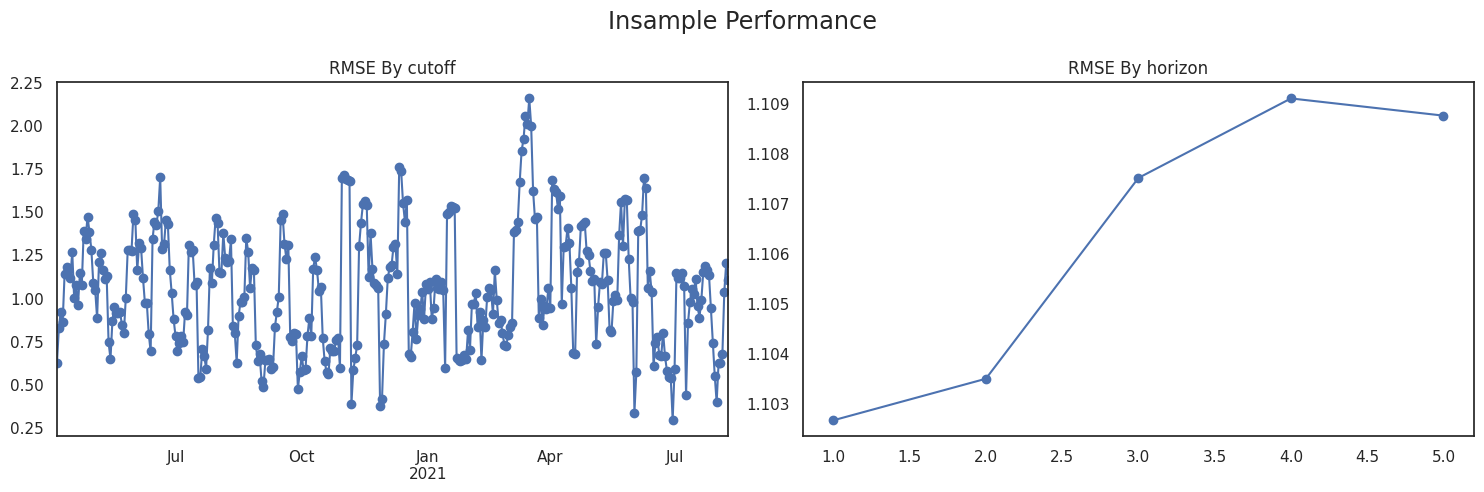

In [15]:
lf_fit.plot.plot_insample_performance(metric='RMSE')

(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'MAPE By cutoff'}>,
        <Axes: title={'center': 'MAPE By horizon'}>], dtype=object))

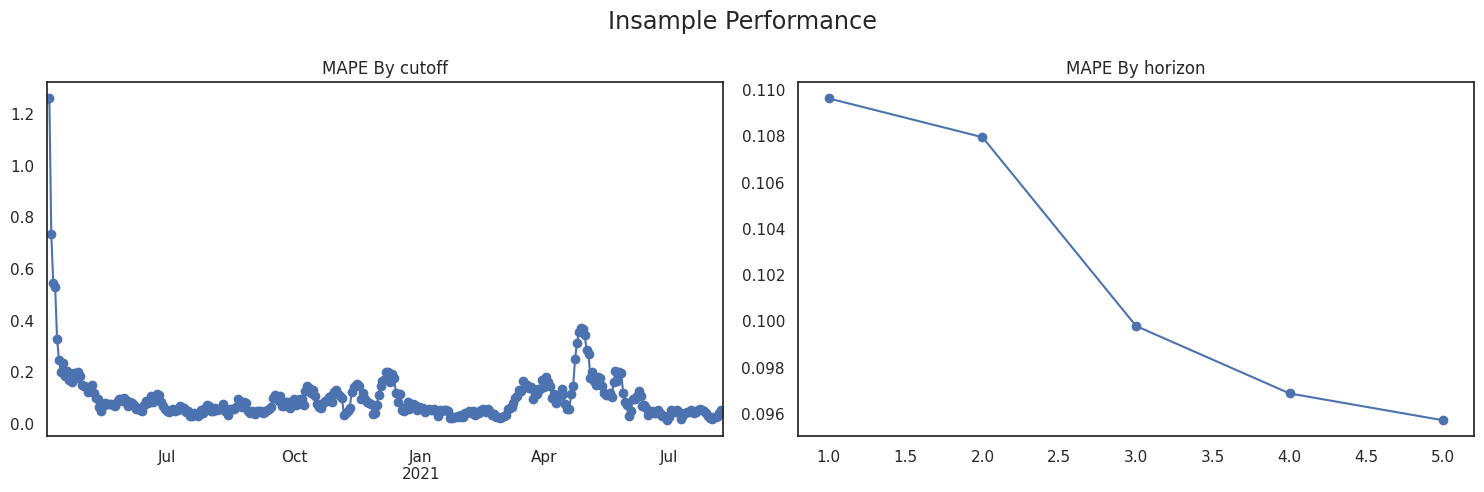

In [16]:
lf_fit.plot.plot_insample_performance(metric='MAPE')

### Out-Of-sample Evaluation

In [17]:
lf_eval= LF.evaluate()


Start AutoARIMA forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/adapters/_generalised_statsforecast.py:120: UserWarning: Keyword arguments "num_cores" will be omitted as they are not found in the __init__ method from <class 'statsforecast.models.AutoARIMA'>. Check your statsforecast version to find out the right API parameters.
  warn(warning_message)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/adapters/_generalised_statsforecast.py:120: UserWarning: Keyword arguments "num_cores" will be omitted as they are not found in the __init__ method from <class 'statsforecast.models.AutoARIMA'>. Check your statsforecast version to find out the right API parameters.
  warn(warning_message)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/adapters/_generalised_statsforecast.py:120: UserWarning: Keyword arguments "num_cores" will be omitted as they are not foun

Evaluation completed in: 0.777 minutes


In [18]:
lf_eval.summary_results()

,Number of Folds,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg RMSE,Avg MAE,Avg MAPE,Avg R2,Avg MedianAE
0,15,32.869126,2.282288,357,707,2021-08-17,2022-12-20,1.575342,1.382092,0.061749,-4.284633,1.401142


In [19]:
lf_eval.summary_horizon()

,RMSE,MAE,MAPE,R2,MedianAE
horizon,,,,,
1,1.062702,0.805211,0.037812,0.945026,0.533539
2,1.482809,1.141388,0.051770,0.873053,1.090564
3,1.745825,1.448386,0.062705,0.819032,1.099761
4,1.981371,1.613314,0.074390,0.794348,1.315591
5,2.364701,1.902159,0.082069,0.652576,1.469133


<Axes: title={'center': 'Out of Sample Performance'}, ylabel='MAPE'>

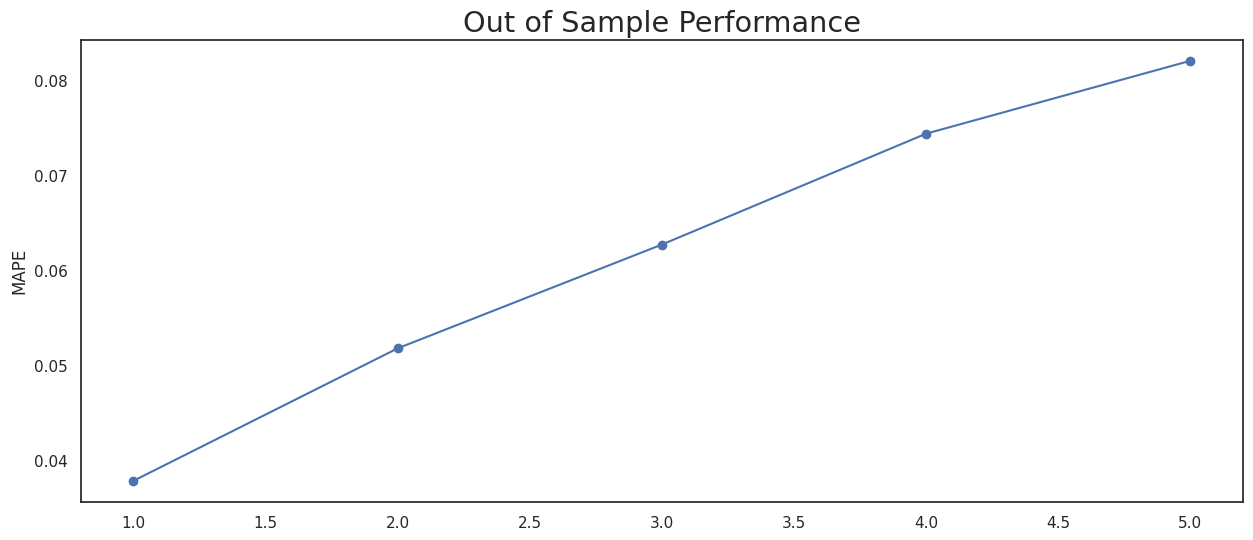

In [20]:
lf_eval.plot.plot_oos_score(score = 'MAPE')

<Axes: title={'center': 'Out of Sample Performance'}, ylabel='MAPE'>

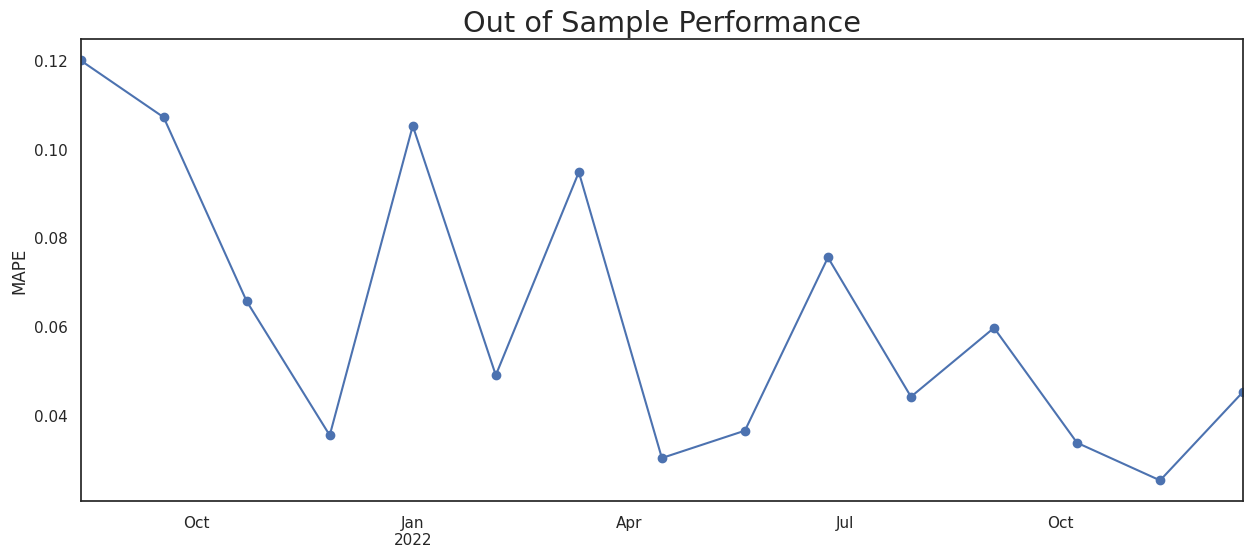

In [22]:
lf_eval.plot.plot_oos_score(score = 'MAPE', view='cutoff')

## Section 4: Generate predictions

In [23]:
# First Fit on all the sample
LF.fit(on ='all')
# Predict
y_pred, y_pred_ints = LF.predict()

(<Figure size 1300x500 with 1 Axes>,
 <Axes: title={'center': 'ARIMA Prediction'}, ylabel='y'>)

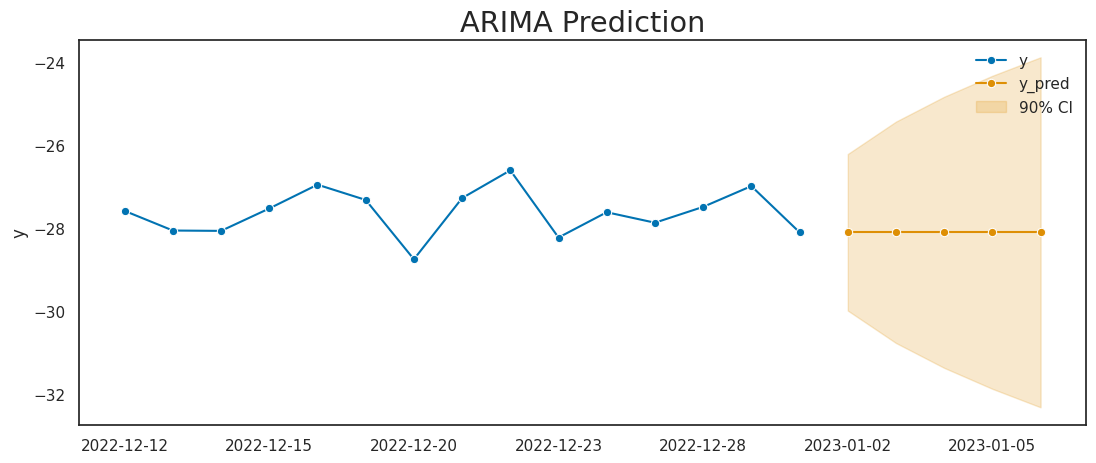

In [24]:
LF.plot.plot_prediction(y_pred, y_pred_ints, 
                        labels=['y', 'y_pred'], 
                        title = 'ARIMA Prediction', 
                        figsize = (13,5))

### Section 5: Update Predictions when new data comes in

### Either with or without refitting the model

(<Figure size 1500x600 with 1 Axes>,
 <Axes: title={'center': 'Prediction'}, ylabel='y'>)

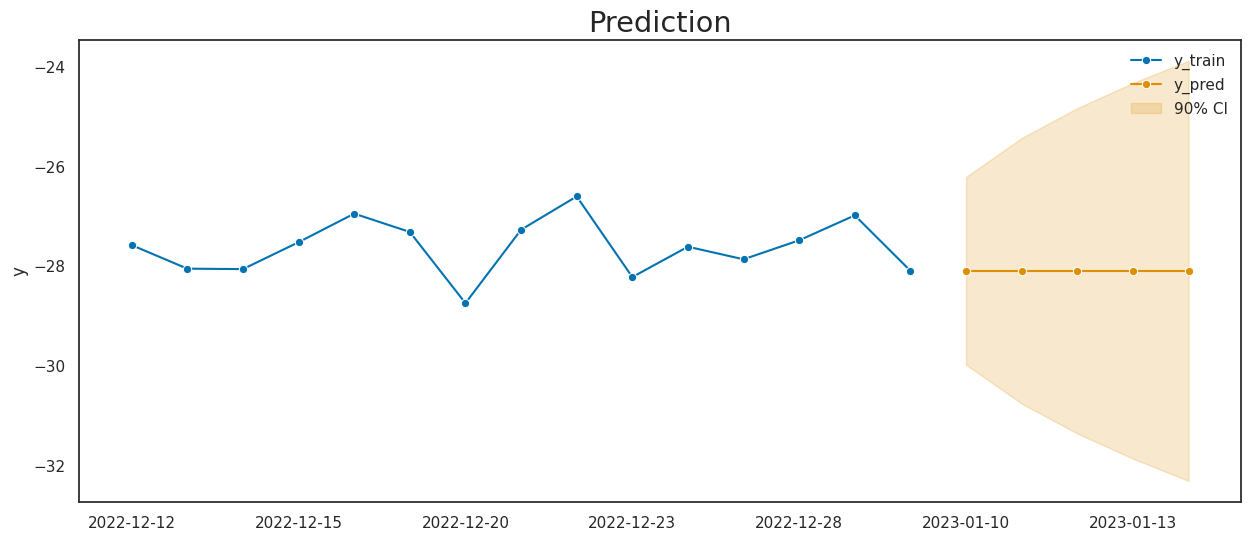

In [33]:
new_y = pd.concat([data.squeeze(), y_pred])
y_pred, y_pred_ints = LF.update(new_y = new_y, refit=False)
LF.plot.plot_prediction(y_pred, y_pred_ints)